Saving resouce.png to resouce (1).png


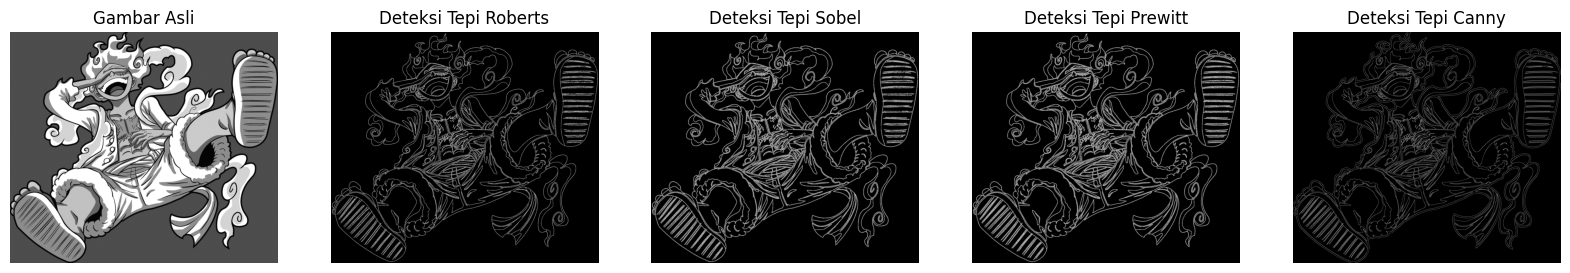

In [6]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from scipy.ndimage import convolve

#gambar
unggah = files.upload()
nama_gambar = list(unggah.keys())[0]
gambar = imageio.imread(nama_gambar, mode='L')

#Roberts
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
tepi_roberts_x = convolve(gambar, roberts_x)
tepi_roberts_y = convolve(gambar, roberts_y)
tepi_roberts = np.sqrt(tepi_roberts_x**2 + tepi_roberts_y**2)
tepi_roberts = (tepi_roberts / tepi_roberts.max()) * 255

#Sobel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
tepi_sobel_x = convolve(gambar, sobel_x)
tepi_sobel_y = convolve(gambar, sobel_y)
tepi_sobel = np.sqrt(tepi_sobel_x**2 + tepi_sobel_y**2)
tepi_sobel = (tepi_sobel / tepi_sobel.max()) * 255

#Canny
tepi_canny = cv2.Canny(gambar, 100, 200)

#Prewitt
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
tepi_prewitt_x = convolve(gambar, prewitt_x)
tepi_prewitt_y = convolve(gambar, prewitt_y)
tepi_prewitt = np.sqrt(tepi_prewitt_x**2 + tepi_prewitt_y**2)
tepi_prewitt = (tepi_prewitt / tepi_prewitt.max()) * 255

#hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(gambar, cmap='gray')
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

axes[1].imshow(tepi_roberts, cmap='gray')
axes[1].set_title("Deteksi Tepi Roberts")
axes[1].axis('off')

axes[2].imshow(tepi_sobel, cmap='gray')
axes[2].set_title("Deteksi Tepi Sobel")
axes[2].axis('off')

axes[3].imshow(tepi_prewitt, cmap='gray')
axes[3].set_title("Deteksi Tepi Prewitt")
axes[3].axis('off')

axes[4].imshow(tepi_canny, cmap='gray')
axes[4].set_title("Deteksi Tepi Canny")
axes[4].axis('off')

plt.show()



Saving resouce.png to resouce (2).png


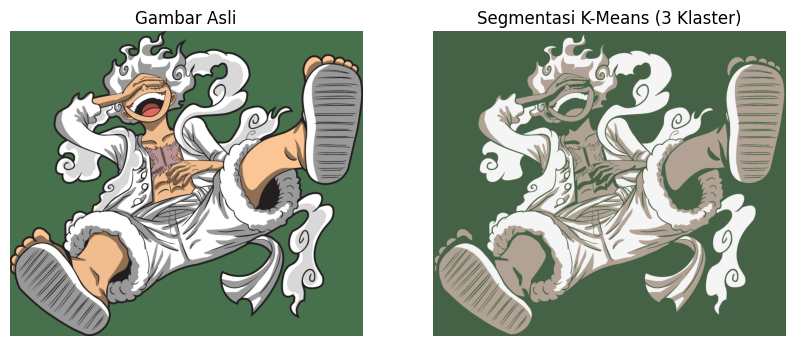

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#gambar
unggah = files.upload()
nama_gambar = list(unggah.keys())[0]

gambar = cv2.imread(nama_gambar)
gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

pixel_gambar = gambar.reshape((-1, 3))
pixel_gambar = np.float32(pixel_gambar)

jumlah_klaster = 3

kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, label, pusat = cv2.kmeans(pixel_gambar, jumlah_klaster, None, kriteria, 10, cv2.KMEANS_RANDOM_CENTERS)

pusat = np.uint8(pusat)
segmen_gambar = pusat[label.flatten()]
segmen_gambar = segmen_gambar.reshape(gambar.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gambar)
axs[0].set_title("Gambar Asli")
axs[0].axis('off')

axs[1].imshow(segmen_gambar)
axs[1].set_title(f"Segmentasi K-Means ({jumlah_klaster} Klaster)")
axs[1].axis('off')

plt.show()
